# Homework 11 - Transfer Learning (Domain Adversarial Training)

> Author: Howard Wang (b08902047@ntu.edu.tw)

If there are any questions, please contact mlta-2023-spring@googlegroups.com

# Readme

In homework 11, you will need to implement Domain Adversarial Training in Transfer Learning. As shown in the bottom left part of the figure.

<img src="https://i.imgur.com/iMVIxCH.png" width="500px">

> 

## Scenario and Why Domain Adversarial Training
Now we have labeled source data and unlabeled target data, where source data might be relavent to the target data. We now want to train a model with source data only and test it on target data.

What problem might occur if we do so? After we have learned Anomaly Detection, we now know that if we test the model with an abnormal data that have never appeared in source data, our trained model is likely to result in poor performance since it is not familiar with the abnormal data.

For example, we have a model that contains Feature Extractor and Classifier:
<img src="https://i.imgur.com/IL0PxCY.png" width="500px">

When the model is trained with source data, the feature extractor 
will extract meaningful features since it is familiar with the distribution of it.It could be seen in the following figure that the blue dots, which is the distribution of source data, has already been clustered into different clusters. Therefore, the Classifier can predict the label based on these clusters.

However, when test on the target data, the Feature Extractor will not be able to extract meaningful features that follow the distribution of the source feature distribution, which result in the classifier learned for the source domain will not be able to apply to the target domain.


## Domain Adversarial Training of Nerural Networks (DaNN)

Based on the above problems, DaNN approaches build mappings between the source (training-time) and the target (test-time) domains, so that the classifier learned for the source domain can also be applied to the target domain, when composed with the learned mapping between domains.

<img src="https://i.imgur.com/vrOE5a6.png" width="500px">

In DaNN, the authors added a Domain Classifier, which is a deep discriminatively-trained classifeir in the training framework to distinguish the data from different domain by the features extracted by the feature extractor. As the training progresses, the approach promotes a domain classifier that discriminates between the source and the target domains and a feature extractor that can extractor features that are discriminative for the main learning task on the source domain and indiscriminate with respect to the shift between the domains. 


The feature extractor are likely to outperform the domain classifier as its input are generated by the feature extractor and that the task of domain classification and label classification are not conflict.

This method leads to the emergence of features that are domain-invariant and on the same feature distribution.

# Data Introduce

Our task contains source data: real photos, and target data: hand-drawn graffiti.

We are going to train the model with the photos and the labels, and try to predict what the labels are for hand-drawn graffiti.

The data could be downloaded [here](https://github.com/redxouls/ml2020spring-hw11-dataset/releases/download/v1.0.0/real_or_drawing.zip). The code below is for data downloading and visualization.

Note that: **The source and target data are all balanced data, you can make use of this information.**

In [1]:
# Download dataset
# !wget "https://github.com/redxouls/ml2020spring-hw11-dataset/releases/download/v1.0.0/real_or_drawing.zip" -O real_or_drawing.zip

# Download from mirrored dataset link
# !wget "https://github.com/redxouls/ml2020spring-hw11-dataset/releases/download/v1.0.1/real_or_drawing.zip" -O real_or_drawing.zip
# !wget "https://github.com/redxouls/ml2020spring-hw11-dataset/releases/download/v1.0.2/real_or_drawing.zip" -O real_or_drawing.zip

# Unzip the files
# !unzip real_or_drawing.zip

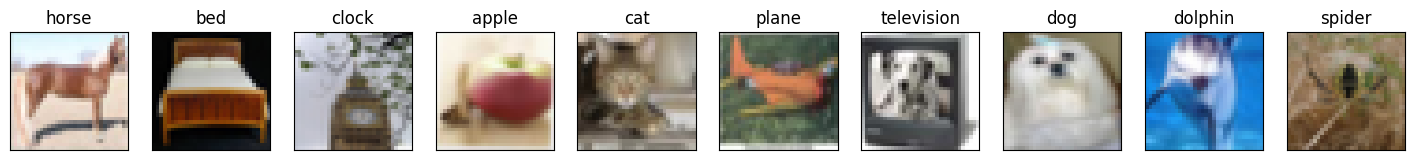

In [2]:
import matplotlib.pyplot as plt

def no_axis_show(img, title='', cmap=None):
  # imshow, and set the interpolation mode to be "nearest"。
  fig = plt.imshow(img, interpolation='nearest', cmap=cmap)
  # do not show the axes in the images.
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)
  plt.title(title)

titles = ['horse', 'bed', 'clock', 'apple', 'cat', 'plane', 'television', 'dog', 'dolphin', 'spider']
plt.figure(figsize=(18, 18))
for i in range(10):
  plt.subplot(1, 10, i+1)
  fig = no_axis_show(plt.imread(f'real_or_drawing/train_data/{i}/{500*i}.bmp'), title=titles[i])

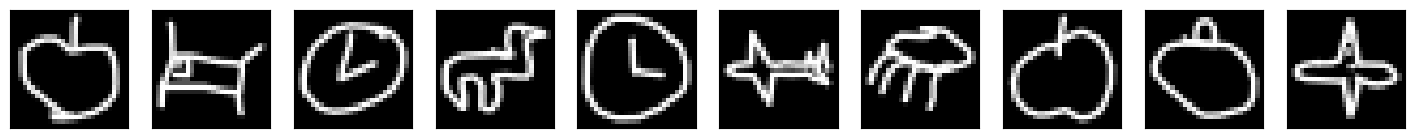

In [3]:
plt.figure(figsize=(18, 18))
for i in range(10):
  plt.subplot(1, 10, i+1)
  fig = no_axis_show(plt.imread(f'real_or_drawing/test_data/0/' + str(i).rjust(5, '0') + '.bmp'))

# Special Domain Knowledge

When we graffiti, we usually draw the outline only, therefore we can perform edge detection processing on the source data to make it more similar to the target data.


## Canny Edge Detection
The implementation of Canny Edge Detection is as follow.
The algorithm will not be describe thoroughly here.  If you are interested, please refer to the wiki or [here](https://medium.com/@pomelyu5199/canny-edge-detector-%E5%AF%A6%E4%BD%9C-opencv-f7d1a0a57d19).

We only need two parameters to implement Canny Edge Detection with CV2:  `low_threshold` and `high_threshold`.

```cv2.Canny(image, low_threshold, high_threshold)```

Simply put, when the edge value exceeds the high_threshold, we determine it as an edge. If the edge value is only above low_threshold, we will then determine whether it is an edge or not.

Let's implement it on the source data.

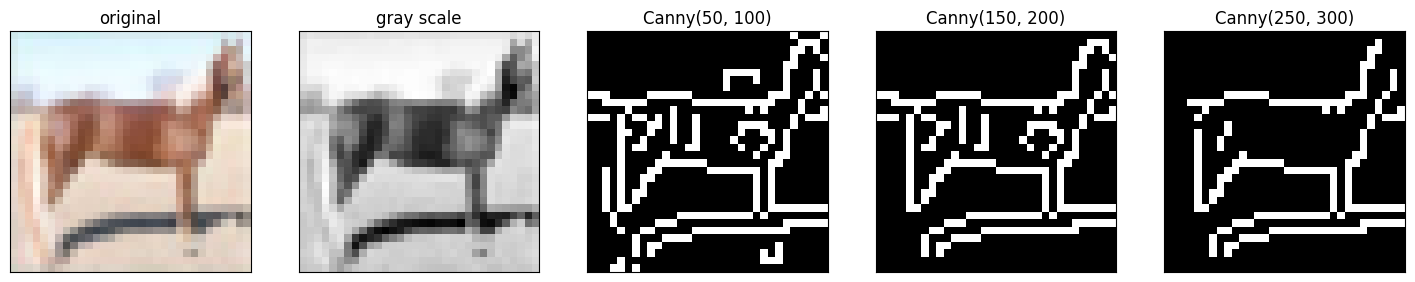

In [4]:
import cv2
import matplotlib.pyplot as plt
titles = ['horse', 'bed', 'clock', 'apple', 'cat', 'plane', 'television', 'dog', 'dolphin', 'spider']
plt.figure(figsize=(18, 18))

original_img = plt.imread(f'real_or_drawing/train_data/0/0.bmp')
plt.subplot(1, 5, 1)
no_axis_show(original_img, title='original')

gray_img = cv2.cvtColor(original_img, cv2.COLOR_RGB2GRAY)
plt.subplot(1, 5, 2)
no_axis_show(gray_img, title='gray scale', cmap='gray')

gray_img = cv2.cvtColor(original_img, cv2.COLOR_RGB2GRAY)
plt.subplot(1, 5, 2)
no_axis_show(gray_img, title='gray scale', cmap='gray')

canny_50100 = cv2.Canny(gray_img, 50, 100)
plt.subplot(1, 5, 3)
no_axis_show(canny_50100, title='Canny(50, 100)', cmap='gray')

canny_150200 = cv2.Canny(gray_img, 150, 200)
plt.subplot(1, 5, 4)
no_axis_show(canny_150200, title='Canny(150, 200)', cmap='gray')

canny_250300 = cv2.Canny(gray_img, 250, 300)
plt.subplot(1, 5, 5)
no_axis_show(canny_250300, title='Canny(250, 300)', cmap='gray')
  

# Data Process
 
 
The data is suitible for `torchvision.ImageFolder`. You can create a dataset with `torchvision.ImageFolder`. Details for image augmentation please refer to the comments in the following codes.

In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Function
 
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
 

from rich.progress import Progress, TextColumn, BarColumn, TimeElapsedColumn, TimeRemainingColumn, track
import time


source_transform = transforms.Compose([
    # Turn RGB to grayscale. (Bacause Canny do not support RGB images.)
    transforms.Grayscale(),
    # cv2 do not support skimage.Image, so we transform it to np.array, 
    # and then adopt cv2.Canny algorithm.
    transforms.Lambda(lambda x: cv2.Canny(np.array(x), 170, 300)),
    # Transform np.array back to the skimage.Image.
    transforms.ToPILImage(),
    # 50% Horizontal Flip. (For Augmentation)
    transforms.RandomHorizontalFlip(),
    # Rotate +- 15 degrees. (For Augmentation), and filled with zero 
    # if there's empty pixel after rotation.
    transforms.RandomRotation(15, fill=(0,)),
    # Transform to tensor for model inputs.
    transforms.ToTensor(),
])
target_transform = transforms.Compose([
    # Turn RGB to grayscale.
    transforms.Grayscale(),
    # Resize: size of source data is 32x32, thus we need to 
    #  enlarge the size of target data from 28x28 to 32x32。
    transforms.Resize((32, 32)),
    # 50% Horizontal Flip. (For Augmentation)
    transforms.RandomHorizontalFlip(),
    # Rotate +- 15 degrees. (For Augmentation), and filled with zero 
    # if there's empty pixel after rotation.
    transforms.RandomRotation(15, fill=(0,)),
    # Transform to tensor for model inputs.
    transforms.ToTensor(),
])
 
source_dataset = ImageFolder('real_or_drawing/train_data', transform=source_transform)
target_dataset = ImageFolder('real_or_drawing/test_data', transform=target_transform)

batch_size_scaler = 10
 
source_dataloader = DataLoader(source_dataset, batch_size=32*batch_size_scaler, shuffle=True)
target_dataloader = DataLoader(target_dataset, batch_size=32*batch_size_scaler, shuffle=True)
test_dataloader = DataLoader(target_dataset, batch_size=128*batch_size_scaler, shuffle=False)

# Model

Feature Extractor: Classic VGG-like architecture

Label Predictor / Domain Classifier: Linear models.

In [6]:
class FeatureExtractor(nn.Module):

    def __init__(self):
        super(FeatureExtractor, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(1, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(128, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(256, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(256, 512, 3, 1, 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
    def forward(self, x):
        x = self.conv(x).squeeze()
        return x

class LabelPredictor(nn.Module):

    def __init__(self):
        super(LabelPredictor, self).__init__()

        self.layer = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(),

            nn.Linear(512, 512),
            nn.ReLU(),

            nn.Linear(512, 10),
        )

    def forward(self, h):
        c = self.layer(h)
        return c

class DomainClassifier(nn.Module):

    def __init__(self):
        super(DomainClassifier, self).__init__()

        self.layer = nn.Sequential(
            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),

            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),

            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),

            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),

            nn.Linear(512, 1),
        )

    def forward(self, h):
        y = self.layer(h)
        return y

# Pre-processing

Here we use Adam as our optimizor.

In [7]:
feature_extractor = FeatureExtractor().cuda()
label_predictor = LabelPredictor().cuda()
domain_classifier = DomainClassifier().cuda()

class_criterion = nn.CrossEntropyLoss()
domain_criterion = nn.BCEWithLogitsLoss()

optimizer_F = optim.Adam(feature_extractor.parameters(), lr=1e-3)
optimizer_C = optim.Adam(label_predictor.parameters(), lr=1e-3)
optimizer_D = optim.Adam(domain_classifier.parameters(), lr=1e-3)

# Start Training


## DaNN Implementation

In the original paper, Gradient Reversal Layer is used.
Feature Extractor, Label Predictor, and Domain Classifier are all trained at the same time. In this code, we train Domain Classifier first, and then train our Feature Extractor (same concept as Generator and Discriminator training process in GAN).

## Reminder
* Lambda, which controls the domain adversarial loss, is adaptive in the original paper. You can refer to [the original work](https://arxiv.org/pdf/1505.07818.pdf) . Here lambda is set to 0.1.
* We do not have the label to target data, you can only evaluate your model by uploading your result to kaggle.:)

In [8]:
def train_epoch(source_dataloader, target_dataloader, progress, lamb):
    '''
      Args:
        source_dataloader: source data的dataloader
        target_dataloader: target data的dataloader
        lamb: control the balance of domain adaptatoin and classification.
    '''

    # D loss: Domain Classifier的loss
    # F loss: Feature Extrator & Label Predictor的loss
    running_D_loss, running_F_loss = 0.0, 0.0
    total_hit, total_num = 0.0, 0.0
    batch_tqdm = progress.add_task(description=f"batch_progress", total=len(source_dataloader))

    for i, ((source_data, source_label), (target_data, _)) in enumerate(zip(source_dataloader, target_dataloader)):

        source_data = source_data.cuda()
        source_label = source_label.cuda()
        target_data = target_data.cuda()
        
        # Mixed the source data and target data, or it'll mislead the running params
        #   of batch_norm. (runnning mean/var of soucre and target data are different.)
        mixed_data = torch.cat([source_data, target_data], dim=0)
        domain_label = torch.zeros([source_data.shape[0] + target_data.shape[0], 1]).cuda()
        # set domain label of source data to be 1.
        domain_label[:source_data.shape[0]] = 1

        # Step 1 : train domain classifier
        feature = feature_extractor(mixed_data)
        # We don't need to train feature extractor in step 1.
        # Thus we detach the feature neuron to avoid backpropgation.
        domain_logits = domain_classifier(feature.detach())
        loss = domain_criterion(domain_logits, domain_label)
        running_D_loss+= loss.item()
        loss.backward()
        optimizer_D.step()

        # Step 2 : train feature extractor and label classifier
        class_logits = label_predictor(feature[:source_data.shape[0]])
        domain_logits = domain_classifier(feature)
        # loss = cross entropy of classification - lamb * domain binary cross entropy.
        #  The reason why using subtraction is similar to generator loss in disciminator of GAN
        loss = class_criterion(class_logits, source_label) - lamb * domain_criterion(domain_logits, domain_label)
        running_F_loss+= loss.item()
        loss.backward()
        optimizer_F.step()
        optimizer_C.step()

        optimizer_D.zero_grad()
        optimizer_F.zero_grad()
        optimizer_C.zero_grad()

        total_hit += torch.sum(torch.argmax(class_logits, dim=1) == source_label).item()
        total_num += source_data.shape[0]
        progress.advance(batch_tqdm, advance=1)

    progress.remove_task(batch_tqdm)
    return running_D_loss / (i+1), running_F_loss / (i+1), total_hit / total_num

num_epochs = 400
lamb = 0.31
# train 200 epochs

with Progress(TextColumn("[progress.description]{task.description}"),
              BarColumn(),
              TextColumn("[progress.percentage]{task.percentage:>3.0f}%"),
              TimeRemainingColumn(),
              TimeElapsedColumn()) as progress:
    epoch_tqdm = progress.add_task(description="epoch progress", total=num_epochs)
    for epoch in range(num_epochs):
        train_D_loss, train_F_loss, train_acc = train_epoch(source_dataloader, target_dataloader, progress, lamb=lamb)
            
        progress.advance(epoch_tqdm, advance=1)
        if epoch == num_epochs//20:
          torch.save(feature_extractor.state_dict(), f'extractor_model_early.bin')
          torch.save(label_predictor.state_dict(), f'predictor_model_early.bin')
        elif epoch == num_epochs//2:
          torch.save(feature_extractor.state_dict(), f'extractor_model_mid.bin')
          torch.save(label_predictor.state_dict(), f'predictor_model_mid.bin')
          
        torch.save(feature_extractor.state_dict(), f'extractor_model.bin')
        torch.save(label_predictor.state_dict(), f'predictor_model.bin')
        print('epoch {:>3d}: train D loss: {:6.4f}, train F loss: {:6.4f}, acc {:6.4f}'.format(epoch, train_D_loss, train_F_loss, train_acc))




Output()

epoch   0: train D loss: 1.1452, train F loss: 2.0332, acc 0.2162

epoch   1: train D loss: 0.9561, train F loss: 1.7464, acc 0.3308

epoch   2: train D loss: 0.4064, train F loss: 1.5741, acc 0.4212

epoch   3: train D loss: 1.1341, train F loss: 1.4321, acc 0.4642

epoch   4: train D loss: 0.5371, train F loss: 1.3837, acc 0.4998

epoch   5: train D loss: 1.0190, train F loss: 1.2810, acc 0.5150

epoch   6: train D loss: 0.3712, train F loss: 1.2807, acc 0.5412

epoch   7: train D loss: 1.0734, train F loss: 1.2055, acc 0.5372

epoch   8: train D loss: 0.5667, train F loss: 1.1866, acc 0.5578

epoch   9: train D loss: 0.8620, train F loss: 1.1265, acc 0.5698

epoch  10: train D loss: 0.7312, train F loss: 1.0907, acc 0.5860

epoch  11: train D loss: 0.6970, train F loss: 1.0837, acc 0.5962

epoch  12: train D loss: 0.7018, train F loss: 1.0385, acc 0.6178

epoch  13: train D loss: 0.6852, train F loss: 1.0179, acc 0.6148

epoch  14: train D loss: 0.6565, train F loss: 0.9811, acc 0.6292

epoch  15: train D loss: 0.6379, train F loss: 0.9426, acc 0.6454

epoch  16: train D loss: 0.5907, train F loss: 0.9401, acc 0.6472

epoch  17: train D loss: 0.5693, train F loss: 0.9263, acc 0.6552

epoch  18: train D loss: 0.6687, train F loss: 0.8627, acc 0.6780

epoch  19: train D loss: 0.6031, train F loss: 0.8570, acc 0.6850

epoch  20: train D loss: 0.5493, train F loss: 0.8092, acc 0.6990

epoch  21: train D loss: 0.6683, train F loss: 0.7859, acc 0.7054

epoch  22: train D loss: 0.5902, train F loss: 0.7618, acc 0.7224

epoch  23: train D loss: 0.5265, train F loss: 0.7353, acc 0.7230

epoch  24: train D loss: 0.6582, train F loss: 0.6960, acc 0.7288

epoch  25: train D loss: 0.6378, train F loss: 0.6755, acc 0.7466

epoch  26: train D loss: 0.6335, train F loss: 0.6553, acc 0.7490

epoch  27: train D loss: 0.6062, train F loss: 0.6237, acc 0.7622

epoch  28: train D loss: 0.6348, train F loss: 0.6050, acc 0.7678

epoch  29: train D loss: 0.5973, train F loss: 0.6007, acc 0.7708

epoch  30: train D loss: 0.5722, train F loss: 0.5306, acc 0.7926

epoch  31: train D loss: 0.6191, train F loss: 0.5097, acc 0.8048

epoch  32: train D loss: 0.5990, train F loss: 0.4946, acc 0.8076

epoch  33: train D loss: 0.6604, train F loss: 0.4631, acc 0.8128

epoch  34: train D loss: 0.6170, train F loss: 0.4862, acc 0.8118

epoch  35: train D loss: 0.6555, train F loss: 0.4450, acc 0.8244

epoch  36: train D loss: 0.6157, train F loss: 0.4590, acc 0.8236

epoch  37: train D loss: 0.5972, train F loss: 0.3929, acc 0.8464

epoch  38: train D loss: 0.5600, train F loss: 0.3721, acc 0.8520

epoch  39: train D loss: 0.6043, train F loss: 0.3930, acc 0.8434

epoch  40: train D loss: 0.4844, train F loss: 0.3615, acc 0.8588

epoch  41: train D loss: 0.4215, train F loss: 0.3275, acc 0.8748

epoch  42: train D loss: 0.4730, train F loss: 0.3331, acc 0.8698

epoch  43: train D loss: 0.4975, train F loss: 0.3294, acc 0.8750

epoch  44: train D loss: 0.6058, train F loss: 0.3125, acc 0.8740

epoch  45: train D loss: 0.5607, train F loss: 0.2883, acc 0.8746

epoch  46: train D loss: 0.5641, train F loss: 0.2555, acc 0.8948

epoch  47: train D loss: 0.5453, train F loss: 0.2555, acc 0.8968

epoch  48: train D loss: 0.5400, train F loss: 0.2595, acc 0.8898

epoch  49: train D loss: 0.5160, train F loss: 0.2518, acc 0.8908

epoch  50: train D loss: 0.4730, train F loss: 0.2047, acc 0.9118

epoch  51: train D loss: 0.5395, train F loss: 0.2024, acc 0.9126

epoch  52: train D loss: 0.5485, train F loss: 0.2130, acc 0.9102

epoch  53: train D loss: 0.5237, train F loss: 0.1899, acc 0.9134

epoch  54: train D loss: 0.6655, train F loss: 0.2067, acc 0.9058

epoch  55: train D loss: 0.4903, train F loss: 0.1854, acc 0.9168

epoch  56: train D loss: 0.5153, train F loss: 0.1623, acc 0.9286

epoch  57: train D loss: 0.5258, train F loss: 0.1635, acc 0.9278

epoch  58: train D loss: 0.5653, train F loss: 0.1939, acc 0.9160

epoch  60: train D loss: 0.4717, train F loss: 0.1431, acc 0.9372

epoch  61: train D loss: 0.5436, train F loss: 0.1588, acc 0.9294

epoch  62: train D loss: 0.4260, train F loss: 0.1436, acc 0.9400

epoch  63: train D loss: 0.4621, train F loss: 0.1526, acc 0.9334

epoch  64: train D loss: 0.4626, train F loss: 0.1355, acc 0.9384

epoch  65: train D loss: 0.4950, train F loss: 0.1043, acc 0.9470

epoch  66: train D loss: 0.4941, train F loss: 0.1055, acc 0.9482

epoch  67: train D loss: 0.5300, train F loss: 0.1182, acc 0.9454

epoch  68: train D loss: 0.5403, train F loss: 0.1128, acc 0.9454

epoch  69: train D loss: 0.5423, train F loss: 0.1071, acc 0.9428

epoch  70: train D loss: 0.5051, train F loss: 0.1038, acc 0.9492

epoch  71: train D loss: 0.5094, train F loss: 0.1062, acc 0.9460

epoch  72: train D loss: 0.5149, train F loss: 0.0930, acc 0.9524

epoch  73: train D loss: 0.4401, train F loss: 0.0929, acc 0.9544

epoch  74: train D loss: 0.5378, train F loss: 0.1088, acc 0.9484

epoch  75: train D loss: 0.4876, train F loss: 0.0742, acc 0.9568

epoch  77: train D loss: 0.4158, train F loss: 0.0958, acc 0.9538

epoch  78: train D loss: 0.5020, train F loss: 0.0970, acc 0.9536

epoch  79: train D loss: 0.4289, train F loss: 0.1065, acc 0.9494

epoch  80: train D loss: 0.4105, train F loss: 0.0887, acc 0.9538

epoch  81: train D loss: 0.5277, train F loss: 0.0919, acc 0.9514

epoch  82: train D loss: 0.4608, train F loss: 0.0857, acc 0.9552

epoch  83: train D loss: 0.4980, train F loss: 0.0711, acc 0.9574

epoch  84: train D loss: 0.4650, train F loss: 0.0632, acc 0.9630

epoch  85: train D loss: 0.4875, train F loss: 0.0677, acc 0.9626

epoch  86: train D loss: 0.5260, train F loss: 0.0501, acc 0.9658

epoch  87: train D loss: 0.4759, train F loss: 0.0489, acc 0.9682

epoch  88: train D loss: 0.4774, train F loss: 0.0647, acc 0.9594

epoch  89: train D loss: 0.5283, train F loss: 0.0647, acc 0.9604

epoch  90: train D loss: 0.5038, train F loss: 0.0681, acc 0.9596

epoch  91: train D loss: 0.5022, train F loss: 0.0596, acc 0.9632

epoch  92: train D loss: 0.4515, train F loss: 0.0771, acc 0.9604

epoch  93: train D loss: 0.4599, train F loss: 0.0782, acc 0.9572

epoch  94: train D loss: 0.4979, train F loss: 0.0520, acc 0.9642

epoch  95: train D loss: 0.5077, train F loss: 0.0467, acc 0.9694

epoch  96: train D loss: 0.4937, train F loss: 0.0489, acc 0.9662

epoch  97: train D loss: 0.4311, train F loss: 0.0582, acc 0.9652

epoch  98: train D loss: 0.5080, train F loss: 0.0555, acc 0.9614

epoch  99: train D loss: 0.5067, train F loss: 0.0562, acc 0.9644

epoch 100: train D loss: 0.4138, train F loss: 0.0707, acc 0.9634

epoch 101: train D loss: 0.4421, train F loss: 0.0383, acc 0.9728

epoch 102: train D loss: 0.4966, train F loss: 0.0228, acc 0.9794

epoch 103: train D loss: 0.4100, train F loss: 0.0319, acc 0.9720

epoch 104: train D loss: 0.4618, train F loss: 0.0313, acc 0.9760

epoch 105: train D loss: 0.4379, train F loss: 0.0492, acc 0.9690

epoch 106: train D loss: 0.5098, train F loss: 0.0471, acc 0.9650

epoch 107: train D loss: 0.4603, train F loss: 0.0501, acc 0.9650

epoch 108: train D loss: 0.4491, train F loss: 0.0422, acc 0.9706

epoch 109: train D loss: 0.4780, train F loss: 0.0340, acc 0.9726

epoch 110: train D loss: 0.4710, train F loss: 0.0297, acc 0.9740

epoch 111: train D loss: 0.4827, train F loss: 0.0310, acc 0.9732

epoch 112: train D loss: 0.4085, train F loss: 0.0393, acc 0.9736

epoch 114: train D loss: 0.4343, train F loss: 0.0312, acc 0.9752

epoch 115: train D loss: 0.4751, train F loss: 0.0376, acc 0.9722

epoch 116: train D loss: 0.4124, train F loss: 0.0379, acc 0.9726

epoch 117: train D loss: 0.4216, train F loss: 0.0375, acc 0.9738

epoch 118: train D loss: 0.4471, train F loss: 0.0314, acc 0.9748

epoch 119: train D loss: 0.4277, train F loss: 0.0490, acc 0.9672

epoch 120: train D loss: 0.4493, train F loss: 0.0520, acc 0.9668

epoch 121: train D loss: 0.4231, train F loss: 0.0517, acc 0.9688

epoch 122: train D loss: 0.4808, train F loss: 0.0405, acc 0.9728

epoch 123: train D loss: 0.4335, train F loss: 0.0431, acc 0.9698

epoch 124: train D loss: 0.4220, train F loss: 0.0451, acc 0.9698

epoch 125: train D loss: 0.4448, train F loss: 0.0255, acc 0.9770

epoch 126: train D loss: 0.4870, train F loss: 0.0236, acc 0.9748

epoch 127: train D loss: 0.4184, train F loss: 0.0361, acc 0.9726

epoch 128: train D loss: 0.4356, train F loss: 0.0324, acc 0.9742

epoch 129: train D loss: 0.4650, train F loss: 0.0149, acc 0.9790

epoch 130: train D loss: 0.4338, train F loss: 0.0290, acc 0.9784

epoch 131: train D loss: 0.4438, train F loss: 0.0328, acc 0.9752

epoch 132: train D loss: 0.4560, train F loss: 0.0354, acc 0.9728

epoch 133: train D loss: 0.4209, train F loss: 0.0325, acc 0.9766

epoch 134: train D loss: 0.4257, train F loss: 0.0346, acc 0.9754

epoch 135: train D loss: 0.4819, train F loss: 0.0356, acc 0.9718

epoch 136: train D loss: 0.4559, train F loss: 0.0374, acc 0.9712

epoch 137: train D loss: 0.4435, train F loss: 0.0200, acc 0.9794

epoch 138: train D loss: 0.4312, train F loss: 0.0178, acc 0.9802

epoch 139: train D loss: 0.3883, train F loss: 0.0194, acc 0.9804

epoch 140: train D loss: 0.4017, train F loss: 0.0268, acc 0.9792

epoch 141: train D loss: 0.4366, train F loss: 0.0176, acc 0.9782

epoch 142: train D loss: 0.4389, train F loss: 0.0252, acc 0.9772

epoch 143: train D loss: 0.4751, train F loss: 0.0105, acc 0.9812

epoch 144: train D loss: 0.4654, train F loss: 0.0278, acc 0.9762

epoch 145: train D loss: 0.4316, train F loss: 0.0416, acc 0.9708

epoch 146: train D loss: 0.4686, train F loss: 0.0235, acc 0.9762

epoch 147: train D loss: 0.4407, train F loss: 0.0204, acc 0.9786

epoch 148: train D loss: 0.4441, train F loss: 0.0170, acc 0.9798

epoch 149: train D loss: 0.4213, train F loss: 0.0259, acc 0.9768

epoch 150: train D loss: 0.4643, train F loss: 0.0234, acc 0.9770

epoch 151: train D loss: 0.4370, train F loss: 0.0131, acc 0.9802

epoch 152: train D loss: 0.4141, train F loss: 0.0207, acc 0.9804

epoch 153: train D loss: 0.4946, train F loss: 0.0309, acc 0.9740

epoch 154: train D loss: 0.4920, train F loss: 0.0197, acc 0.9750

epoch 155: train D loss: 0.4786, train F loss: 0.0185, acc 0.9792

epoch 156: train D loss: 0.4774, train F loss: 0.0292, acc 0.9720

epoch 157: train D loss: 0.4349, train F loss: 0.0225, acc 0.9768

epoch 158: train D loss: 0.4812, train F loss: 0.0103, acc 0.9804

epoch 159: train D loss: 0.4824, train F loss: 0.0039, acc 0.9806

epoch 160: train D loss: 0.4667, train F loss: 0.0122, acc 0.9816

epoch 161: train D loss: 0.4317, train F loss: 0.0096, acc 0.9838

epoch 162: train D loss: 0.4358, train F loss: 0.0111, acc 0.9812

epoch 163: train D loss: 0.4727, train F loss: 0.0131, acc 0.9784

epoch 164: train D loss: 0.4524, train F loss: 0.0205, acc 0.9790

epoch 165: train D loss: 0.4554, train F loss: 0.0261, acc 0.9778

epoch 166: train D loss: 0.4486, train F loss: 0.0348, acc 0.9750

epoch 167: train D loss: 0.4738, train F loss: 0.0297, acc 0.9748

epoch 168: train D loss: 0.4598, train F loss: 0.0154, acc 0.9808

epoch 169: train D loss: 0.4388, train F loss: 0.0046, acc 0.9822

epoch 170: train D loss: 0.4492, train F loss: 0.0028, acc 0.9848

epoch 171: train D loss: 0.4539, train F loss: 0.0021, acc 0.9850

epoch 172: train D loss: 0.4730, train F loss: 0.0105, acc 0.9804

epoch 173: train D loss: 0.4624, train F loss: 0.0196, acc 0.9780

epoch 174: train D loss: 0.4329, train F loss: 0.0229, acc 0.9754

epoch 175: train D loss: 0.4511, train F loss: 0.0149, acc 0.9812

epoch 176: train D loss: 0.4742, train F loss: 0.0264, acc 0.9762

epoch 177: train D loss: 0.4289, train F loss: 0.0159, acc 0.9802

epoch 178: train D loss: 0.4586, train F loss: 0.0016, acc 0.9826

epoch 179: train D loss: 0.4532, train F loss: 0.0122, acc 0.9818

epoch 180: train D loss: 0.4439, train F loss: 0.0175, acc 0.9814

epoch 181: train D loss: 0.4361, train F loss: 0.0119, acc 0.9820

epoch 182: train D loss: 0.4222, train F loss: 0.0087, acc 0.9820

epoch 183: train D loss: 0.4340, train F loss: 0.0035, acc 0.9854

# Inference

We use pandas to generate our csv file.

BTW, the performance of the model trained for 200 epoches might be unstable. You can train for more epoches for a more stable performance.

In [ ]:
result = []
label_predictor.load_state_dict(torch.load('predictor_model.bin'))
feature_extractor.load_state_dict(torch.load('extractor_model.bin'))
label_predictor.eval()
feature_extractor.eval()
with Progress(TextColumn("[progress.description]{task.description}"),
              BarColumn(),
              TextColumn("[progress.percentage]{task.percentage:>3.0f}%"),
              TimeRemainingColumn(),
              TimeElapsedColumn()) as progress:
    test_tqdm = progress.add_task(description="inference progress", total=len(test_dataloader))
    for i, (test_data, _) in (enumerate(test_dataloader)):
        test_data = test_data.cuda()

        class_logits = label_predictor(feature_extractor(test_data))

        x = torch.argmax(class_logits, dim=1).cpu().detach().numpy()
        result.append(x)
        progress.advance(test_tqdm)

import pandas as pd
result = np.concatenate(result)

# Generate your submission
df = pd.DataFrame({'id': np.arange(0,len(result)), 'label': result})
df.to_csv('DaNN_submission.csv',index=False)

# Visualization
We use t-SNE plot to observe the distribution of extracted features.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold

## Step1: Load checkpoint and evaluate to get extracted features

In [ ]:
# Hints:
# Set features_extractor to eval mode
feature_extractor.eval()

# Load saved checkpoints
feature_extractor.load_state_dict(torch.load('extractor_model.bin'))


# Start evaluation and collect features and labels
test_dataloader = DataLoader(target_dataset, batch_size=128*batch_size_scaler, shuffle=False)
features, labels = [], []
for i, (test_data, test_label) in enumerate(test_dataloader):
    test_data = test_data.cuda()
    feature = feature_extractor(test_data)
    features.append(feature.cpu().detach().numpy())
    labels.append(test_label.numpy())
    
features = np.concatenate(features)
labels = np.concatenate(labels)

# t-SNE embedding
X_tsne = manifold.TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(features)

## Step2: Apply t-SNE and normalize

In [ ]:
# process extracted features with t-SNE
X_tsne = manifold.TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(X)

# Normalization the processed features 
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)

## Step3: Visualization with matplotlib

In [ ]:
# Data Visualization
# Use matplotlib to plot the distribution
# The shape of X_norm is (N,2)

# Training Statistics

- Number of parameters:
  - Feature Extractor: 2, 142, 336
  - Label Predictor: 530, 442
  - Domain Classifier: 1, 055, 233

- Simple
 - Training time on colab: ~ 1 hr
- Medium
 - Training time on colab: 2 ~ 4 hr
- Strong
 - Training time on colab: 5 ~ 6 hrs
- Boss
 - **Unmeasurable**

# Learning Curve (Strong Baseline)
* This method is slightly different from colab.

![Loss Curve](https://i.imgur.com/vIujQyo.png)

# Accuracy Curve (Strong Baseline)
* Note that you cannot access testing accuracy. But this plot tells you that even though the model overfits the training data, the testing accuracy is still improving, and that's why you need to train more epochs.

![Acc Curve](https://i.imgur.com/4W1otXG.png)



# Q&A

If there is any problem related to Domain Adaptation, please email to b08902047@ntu.edu.tw / mlta-2023-spring@googlegroups.com。

